# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&units=metric&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | yuzhno-kurilsk
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | lihue
Processing Record 9 of Set 1 | komsomol'skiy
Processing Record 10 of Set 1 | mision de chichimecas
City not found. Skipping...
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | nyurba
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | bilibino
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,9.91,71,75,0.00,SJ,1691389211
1,college,64.8569,-147.8028,22.67,64,75,2.06,US,1691389011
2,yuzhno-kurilsk,44.0306,145.8556,15.39,93,100,3.34,RU,1691389212
3,avarua,-21.2078,-159.7750,22.03,88,75,2.06,CK,1691389081
4,jamestown,42.0970,-79.2353,22.48,100,100,2.57,US,1691389050


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,9.91,71,75,0.00,SJ,1691389211
1,college,64.8569,-147.8028,22.67,64,75,2.06,US,1691389011
2,yuzhno-kurilsk,44.0306,145.8556,15.39,93,100,3.34,RU,1691389212
3,avarua,-21.2078,-159.7750,22.03,88,75,2.06,CK,1691389081
4,jamestown,42.0970,-79.2353,22.48,100,100,2.57,US,1691389050


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

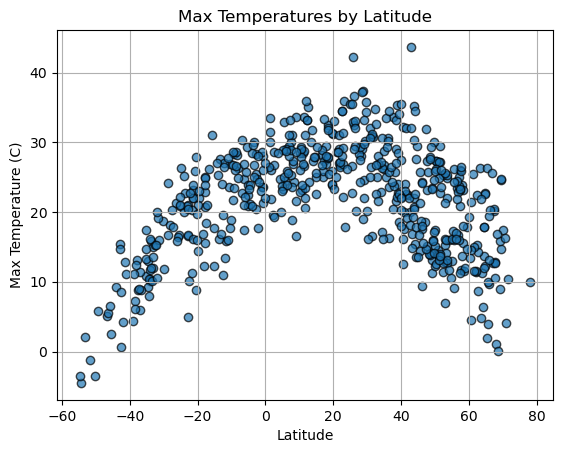

In [8]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
temperatures = city_data_df["Max Temp"]
plt.scatter(latitudes, temperatures, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("Max Temperatures by Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

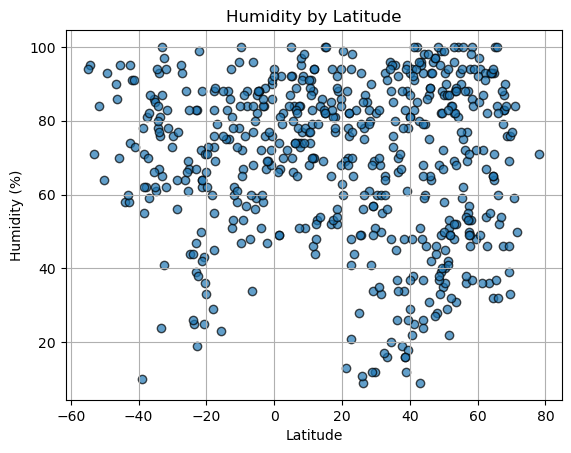

In [9]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df["Lat"]
humidities = city_data_df["Humidity"]
plt.scatter(latitudes, humidities, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("Humidity by Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

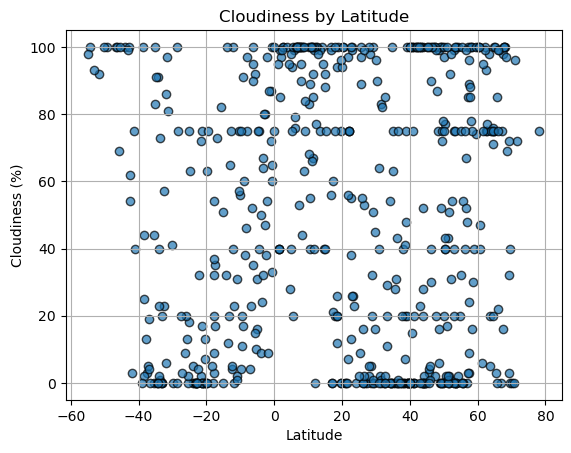

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitudes, cloudiness, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("Cloudiness by Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

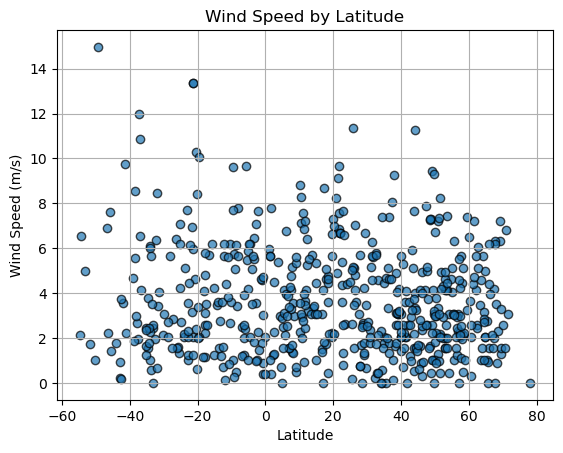

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitudes = city_data_df["Lat"]
wind_speeds = city_data_df["Wind Speed"]
plt.scatter(latitudes, wind_speeds, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("Wind Speed by Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linreg(x_col, y_col, coord):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_col, y_col)
    correlation = st.pearsonr(x_col, y_col)
    regress_values = x_col * slope + intercept
    line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
    plt.scatter(x_col, y_col)
    plt.xlabel(x_col.name)
    plt.ylabel(y_col.name)
    plt.title(f"{y_col.name} v. {x_col.name}")
    plt.plot(x_col, regress_values, color="red")
    plt.annotate(line_eq, coord, fontsize=15, color="red")
    print(f"The correlation between {x_col.name} and {y_col.name} is {round(correlation[0], 2)}.")
    print(f"The r-value is {rvalue}.")
    print(f"The p-value is {correlation[1]}.")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,9.91,71,75,0.00,SJ,1691389211
1,college,64.8569,-147.8028,22.67,64,75,2.06,US,1691389011
2,yuzhno-kurilsk,44.0306,145.8556,15.39,93,100,3.34,RU,1691389212
4,jamestown,42.0970,-79.2353,22.48,100,100,2.57,US,1691389050
6,georgetown,5.4112,100.3354,32.96,66,20,4.12,MY,1691389214


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,avarua,-21.2078,-159.7750,22.03,88,75,2.06,CK,1691389081
5,port-aux-francais,-49.3500,70.2167,5.85,93,100,14.97,TF,1691389213
12,grytviken,-54.2811,-36.5092,-4.50,95,100,6.56,GS,1691389218
13,port alfred,-33.5906,26.8910,15.81,76,1,0.58,ZA,1691389219
14,ushuaia,-54.8000,-68.3000,-3.50,94,98,2.12,AR,1691388994


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Lat and Max Temp is -0.59.
The r-value is -0.5909837089729986.
The p-value is 7.650466522755084e-39.


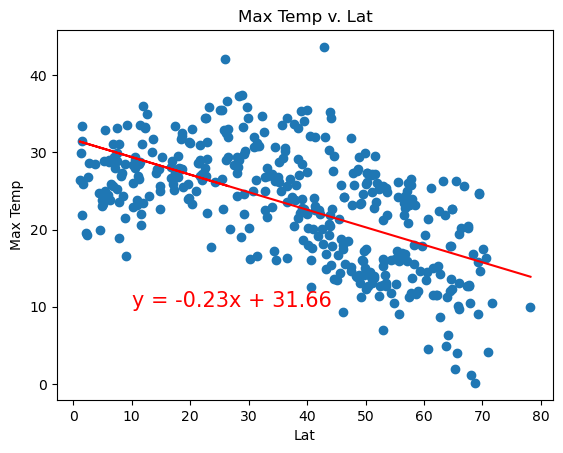

In [15]:
# Linear regression on Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,10))

The correlation between Lat and Max Temp is 0.81.
The r-value is 0.8119851265284117.
The p-value is 2.627056919014083e-42.


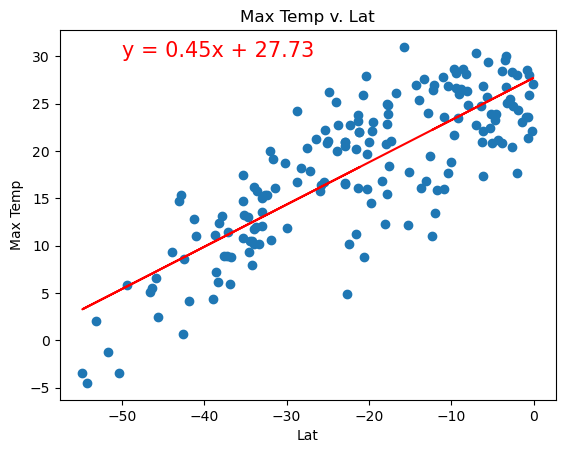

In [16]:
# Linear regression on Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-50,30))

**Discussion about the linear relationship:** Given that 0 represents the equator, we can observe that the max temperatures get higher the closer the latitude to the equator and lower the further the latitude from the equator. This creates a direct linear relationship for the southern hemisphere and a indirect linear relationship for the northern hemisphere. The r-value tells us the correlation is high and the p-value tells us that the relationship is statistically significant.

### Humidity vs. Latitude Linear Regression Plot

The correlation between Lat and Humidity is -0.09.
The r-value is -0.08948254120639966.
The p-value is 0.07456435501625153.


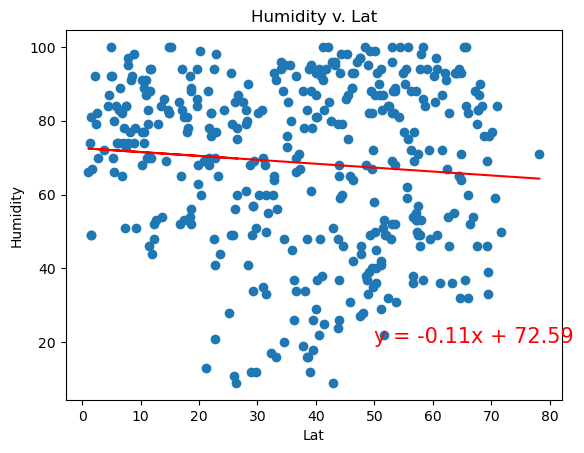

In [17]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50,20))

The correlation between Lat and Humidity is -0.03.
The r-value is -0.030943884682799367.
The p-value is 0.6843657683590515.


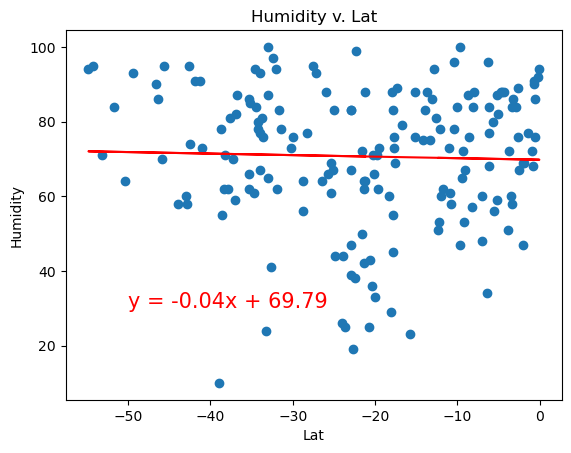

In [18]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-50,30))

**Discussion about the linear relationship:** The relationships appear to be weak here between latitude and humidity. The r-values, which tell us the correlation strength, are low. The p-values, which tell us the statistical significance, would indicate that these relationships could potentially be random and insignificant. If humidity does correlate with latitude, it is not supported by this sample of data.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Lat and Cloudiness is -0.14.
The r-value is -0.1385495280844879.
The p-value is 0.005627596976702772.


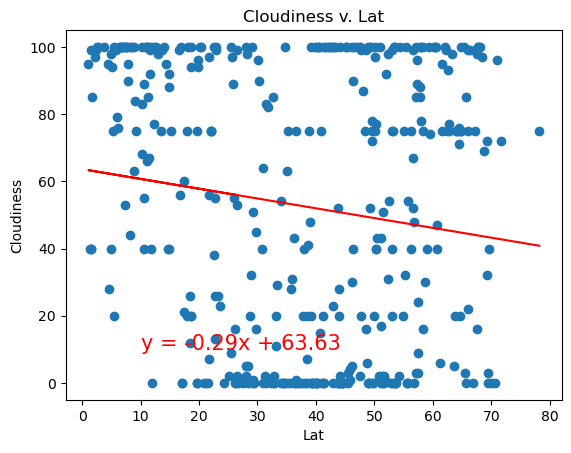

In [19]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (10,10))

The correlation between Lat and Cloudiness is -0.03.
The r-value is -0.031025618486706263.
The p-value is 0.6835767789616956.


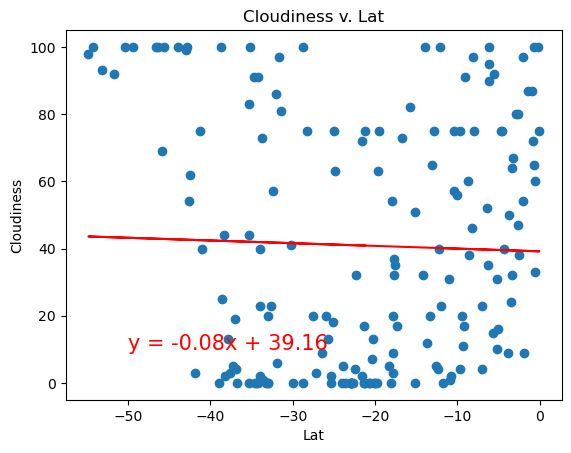

In [20]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50,10))

**Discussion about the linear relationship:** Many of the samples seem to be at the extremes, either clear skies or completely cloudy. From the r-values and p-values, the relationship here appears to be weak as well. If cloudiness correlates with latitude, this sample data would not prove or support that conclusion.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Lat and Wind Speed is -0.1.
The r-value is -0.10494566165803226.
The p-value is 0.03636195817770326.


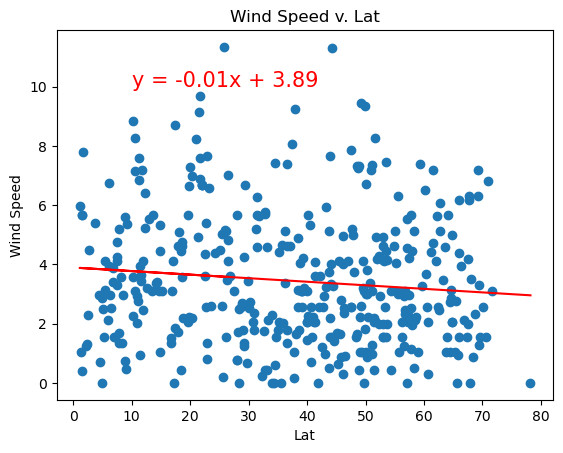

In [23]:
# Northern Hemisphere
plot_linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10,10))

The correlation between Lat and Wind Speed is -0.04.
The r-value is -0.044194262344683995.
The p-value is 0.5614229590348714.


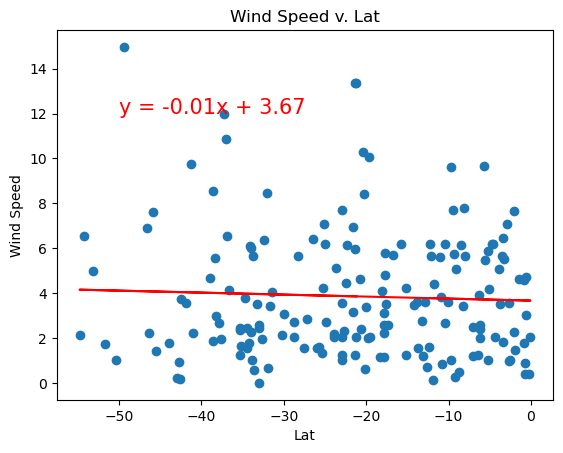

In [24]:
# Southern Hemisphere
plot_linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50,12))

**Discussion about the linear relationship:** Again the relationships seem weak here. The northern hemisphere maybe has a slight indirect linear relationship between latitude and wind speed, but that pattern theoretically would be reflected in the southern hemisphere as well and the relationship is even weaker there. This data does not provide strong evidence that wind speed has a strong correlation with latitude.